## This is Facebook Prophet practice

In [1]:
import pandas as pd

In [2]:
import prophet

c:\Users\Selim\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
### Load the data
df=pd.read_csv("./UDEMY_TSA_FINAL/Data/BeerWineLiquor.csv")

In [4]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [5]:
### change the data format to ds, y
df.columns=["ds","y"]

In [6]:
df

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
...,...,...
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130


In [7]:
df["ds"]=pd.to_datetime(df["ds"])

In [8]:
df.ds

0     1992-01-01
1     1992-02-01
2     1992-03-01
3     1992-04-01
4     1992-05-01
         ...    
319   2018-08-01
320   2018-09-01
321   2018-10-01
322   2018-11-01
323   2018-12-01
Name: ds, Length: 324, dtype: datetime64[ns]

In [9]:
#### create and fit the model
# m=Prophet()
# m.fit(df)

In [10]:
m = prophet.Prophet(seasonality_mode='multiplicative').fit(df)

22:34:43 - cmdstanpy - INFO - Chain [1] start processing
22:34:43 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future=m.make_future_dataframe(periods=24,freq="MS")

In [12]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [13]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [14]:
len(df), len(future)

(324, 348)

#### Predict and fill the values for future

In [15]:
forecast=m.predict(future)

In [16]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1992-01-01,1780.930970,1409.920120,1580.935991,1780.930970,1780.930970,-0.159155,-0.159155,-0.159155,-0.159155,-0.159155,-0.159155,0.0,0.0,0.0,1497.487717
1,1992-02-01,1782.864053,1442.351910,1613.808931,1782.864053,1782.864053,-0.144135,-0.144135,-0.144135,-0.144135,-0.144135,-0.144135,0.0,0.0,0.0,1525.891777
2,1992-03-01,1784.672421,1595.484452,1763.764370,1784.672421,1784.672421,-0.060558,-0.060558,-0.060558,-0.060558,-0.060558,-0.060558,0.0,0.0,0.0,1676.595412
3,1992-04-01,1786.605504,1583.247331,1756.735371,1786.605504,1786.605504,-0.066089,-0.066089,-0.066089,-0.066089,-0.066089,-0.066089,0.0,0.0,0.0,1668.530999
4,1992-05-01,1788.476229,1733.861731,1906.301048,1788.476229,1788.476229,0.018630,0.018630,0.018630,0.018630,0.018630,0.018630,0.0,0.0,0.0,1821.796012


In [17]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
343,2020-08-01,5173.332582,5162.810325,5339.621179,5143.595076,5202.936920,0.015074,0.015074,0.015074,0.015074,0.015074,0.015074,0.0,0.0,0.0,5251.313046
344,2020-09-01,5189.062653,4884.843333,5073.053106,5156.569398,5220.592245,-0.041161,-0.041161,-0.041161,-0.041161,-0.041161,-0.041161,0.0,0.0,0.0,4975.475049
345,2020-10-01,5204.285302,5030.397149,5217.448084,5169.131616,5238.372966,-0.016158,-0.016158,-0.016158,-0.016158,-0.016158,-0.016158,0.0,0.0,0.0,5120.192141
346,2020-11-01,5220.015373,5289.155350,5473.622706,5182.265535,5255.761320,0.030804,0.030804,0.030804,0.030804,0.030804,0.030804,0.0,0.0,0.0,5380.810279
347,2020-12-01,5235.238022,6981.299816,7192.711514,5195.053962,5272.841181,0.353794,0.353794,0.353794,0.353794,0.353794,0.353794,0.0,0.0,0.0,7087.433841


In [18]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yhat'],
      dtype='object')

In [19]:
forecast[['ds', 'trend', 'yhat_lower', 'yhat_upper']].tail()

,ds,trend,yhat_lower,yhat_upper
343,2020-08-01,5173.332582,5162.810325,5339.621179
344,2020-09-01,5189.062653,4884.843333,5073.053106
345,2020-10-01,5204.285302,5030.397149,5217.448084
346,2020-11-01,5220.015373,5289.155350,5473.622706
347,2020-12-01,5235.238022,6981.299816,7192.711514


In [20]:
### plotting the foreacast

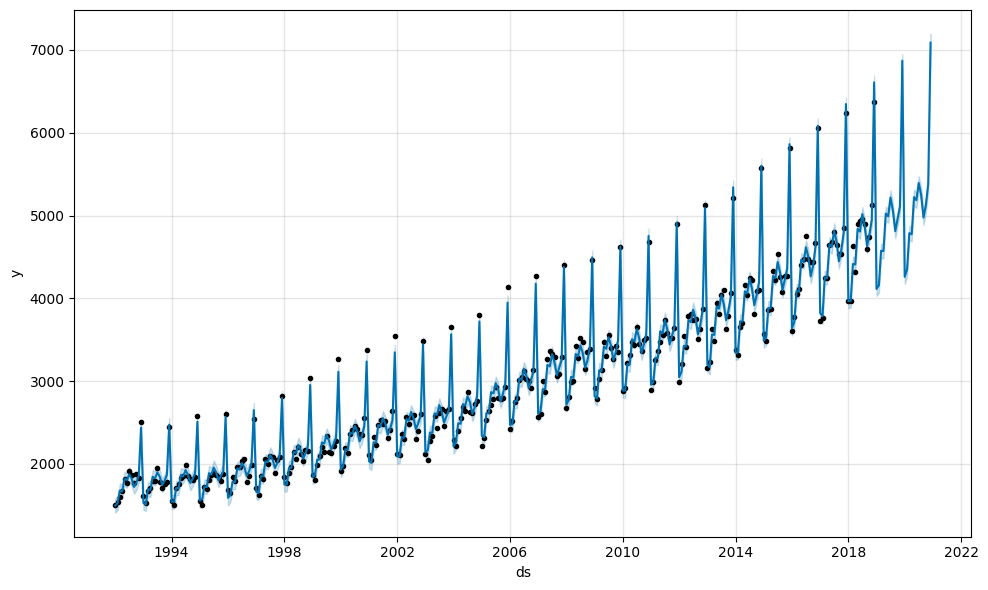

In [21]:
m.plot(forecast);

(15645.0, 18597.0)

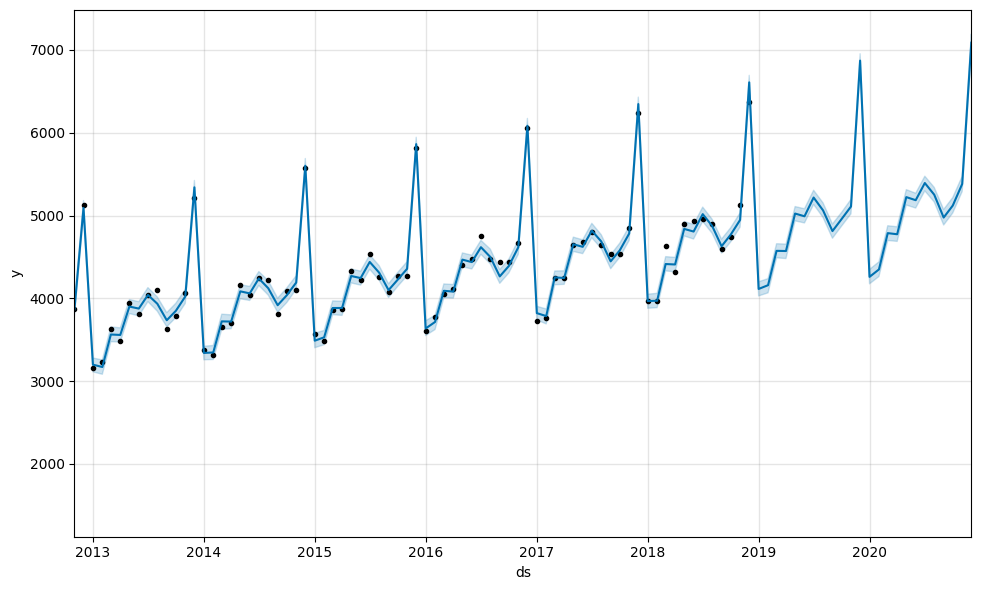

In [22]:
import matplotlib.pyplot as plt
import datetime

m.plot(forecast);
plt.xlim(forecast.ds[250].date(),forecast.ds[347].date())

In [23]:
type(forecast.ds[347].date())

datetime.date

<AxesSubplot:xlabel='ds'>

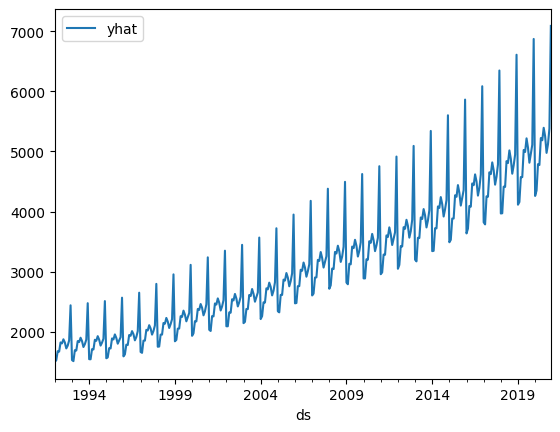

In [24]:
forecast.plot(x="ds",y="yhat")

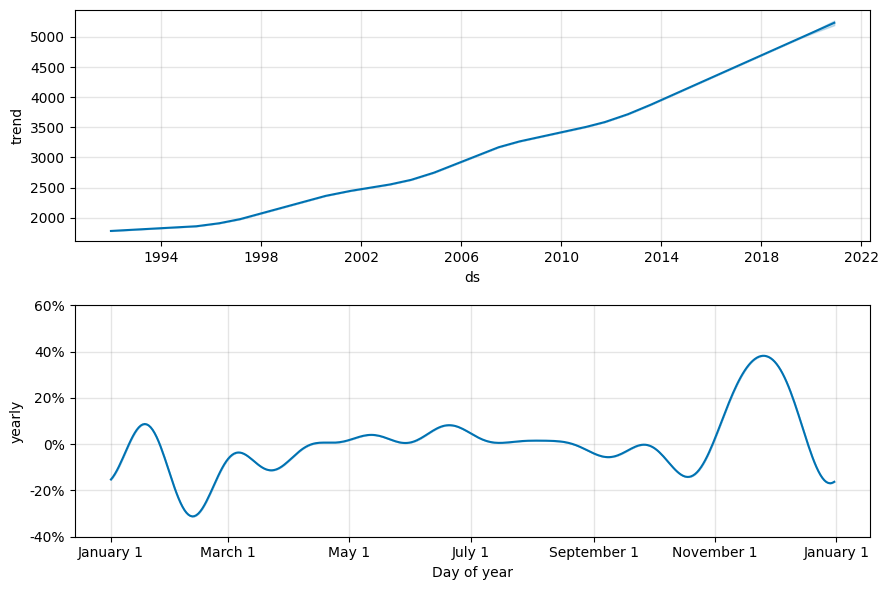

In [25]:
m.plot_components(forecast);

### Prophet Evaluations

In [1]:
## train/test split

In [2]:
import pandas as pd
import prophet

c:\Users\Selim\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df=pd.read_csv("./UDEMY_TSA_FINAL/Data/Miles_Traveled.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [5]:
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [6]:
df.columns=["ds","y"]
df["ds"]=pd.to_datetime(df["ds"])
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


<AxesSubplot:xlabel='ds'>

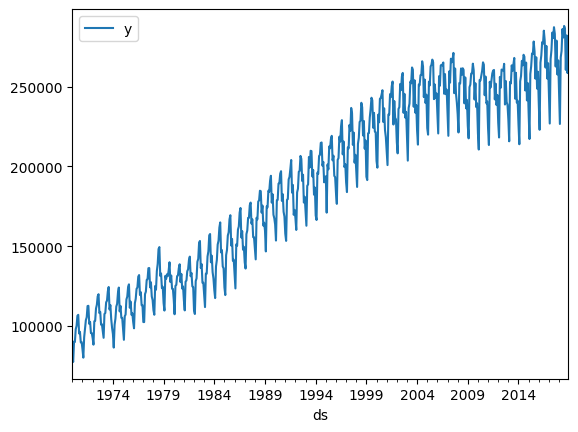

In [8]:
df.plot(x="ds",y="y")

In [9]:
len(df), len(df)-12

(588, 576)

In [10]:
train=df.iloc[:576]
test=df.iloc[576:]

In [11]:
m=prophet.Prophet()

In [12]:
m.fit(train)

01:02:51 - cmdstanpy - INFO - Chain [1] start processing
01:02:51 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future=m.make_future_dataframe(periods=12,freq="MS")

In [14]:
forecast=m.predict(future)

In [16]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263259.631706,273904.562817,285727.534340,263197.718545,263322.056267,16449.550366,16449.550366,16449.550366,16449.550366,16449.550366,16449.550366,0.0,0.0,0.0,279709.182072
584,2018-09-01,263398.341584,256261.924815,268047.010819,263297.381929,263480.082871,-1667.533350,-1667.533350,-1667.533350,-1667.533350,-1667.533350,-1667.533350,0.0,0.0,0.0,261730.808234
585,2018-10-01,263532.576949,262981.726560,274005.264291,263393.682489,263632.449204,5309.074263,5309.074263,5309.074263,5309.074263,5309.074263,5309.074263,0.0,0.0,0.0,268841.651212
586,2018-11-01,263671.286826,249399.937541,260785.824879,263488.887119,263805.506318,-8205.142435,-8205.142435,-8205.142435,-8205.142435,-8205.142435,-8205.142435,0.0,0.0,0.0,255466.144392
587,2018-12-01,263805.522192,251373.629159,262573.772556,263580.295523,263975.166830,-6918.629429,-6918.629429,-6918.629429,-6918.629429,-6918.629429,-6918.629429,0.0,0.0,0.0,256886.892763


In [17]:
test.tail()

,ds,y
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


ax is the parameter

<AxesSubplot:xlabel='ds'>

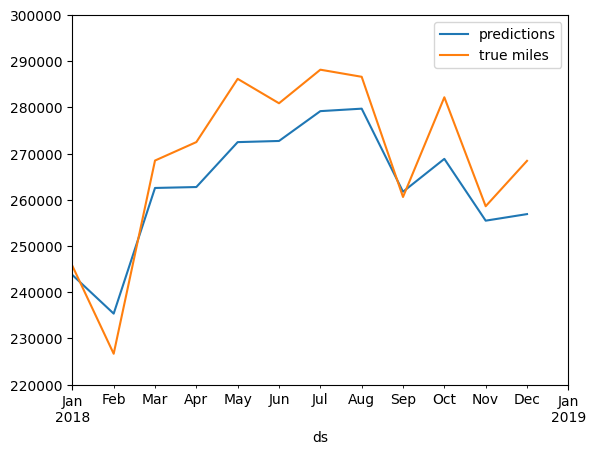

In [23]:
ax=forecast.plot(x="ds",y="yhat",label="predictions",legend=True)

test.plot(x="ds",y="y",label="true miles",legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'),ylim=(220000,300000))

In [24]:
from statsmodels.tools.eval_measures import rmse

In [25]:
predictions=forecast.iloc[-12:]["yhat"]

In [27]:
predictions, test["y"]

(576    243718.687623
 577    235346.300721
 578    262547.147937
 579    262745.730889
 580    272466.972940
 581    272717.536061
 582    279174.637816
 583    279709.182072
 584    261730.808234
 585    268841.651212
 586    255466.144392
 587    256886.892763
 Name: yhat, dtype: float64,
 576    245695.0
 577    226660.0
 578    268480.0
 579    272475.0
 580    286164.0
 581    280877.0
 582    288145.0
 583    286608.0
 584    260595.0
 585    282174.0
 586    258590.0
 587    268413.0
 Name: y, dtype: float64)

In [28]:
rmse(predictions,test["y"])

8723.114585667272

In [31]:
test.mean()

C:\Users\Selim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


y    268739.666667
dtype: float64

## Prophet Diagnostics

In [34]:
# from fbprophet.diagnostics import cross_validation,performance_metrics
# from fbprophet.plot import plot_cross_validation_metric

In [33]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [35]:
len(df), len(df)/12

(588, 49.0)

In [36]:
help(pd.Timedelta)

Help on class Timedelta in module pandas._libs.tslibs.timedeltas:

class Timedelta(_Timedelta)
 |  Timedelta(value=<object object at 0x000001BECAD9DD40>, unit=None, **kwargs)
 |  
 |  Represents a duration, the difference between two dates or times.
 |  
 |  Timedelta is the pandas equivalent of python's ``datetime.timedelta``
 |  and is interchangeable with it in most cases.
 |  
 |  Parameters
 |  ----------
 |  value : Timedelta, timedelta, np.timedelta64, str, or int
 |  unit : str, default 'ns'
 |      Denote the unit of the input, if input is an integer.
 |  
 |      Possible values:
 |  
 |      * 'W', 'D', 'T', 'S', 'L', 'U', or 'N'
 |      * 'days' or 'day'
 |      * 'hours', 'hour', 'hr', or 'h'
 |      * 'minutes', 'minute', 'min', or 'm'
 |      * 'seconds', 'second', or 'sec'
 |      * 'milliseconds', 'millisecond', 'millis', or 'milli'
 |      * 'microseconds', 'microsecond', 'micros', or 'micro'
 |      * 'nanoseconds', 'nanosecond', 'nanos', 'nano', or 'ns'.
 |  
 |  **

In [37]:
# for the 5 years training period
initial=5*365
initial= str(initial) + " days"



In [38]:
#fold every 5 years
period=5*365
period=str(period)+ " days"

In [39]:
#forecast 1 year into horizon
horizon=365
horizon=str(horizon) + " days"

In [40]:
df_cv=cross_validation(m,initial=initial,period=period,horizon=horizon)

  0%|          | 0/9 [00:00<?, ?it/s]01:22:16 - cmdstanpy - INFO - Chain [1] start processing
01:22:17 - cmdstanpy - INFO - Chain [1] done processing
 11%|█         | 1/9 [00:01<00:15,  1.88s/it]01:22:18 - cmdstanpy - INFO - Chain [1] start processing
01:22:18 - cmdstanpy - INFO - Chain [1] done processing
 22%|██▏       | 2/9 [00:02<00:08,  1.17s/it]01:22:19 - cmdstanpy - INFO - Chain [1] start processing
01:22:19 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 3/9 [00:03<00:06,  1.04s/it]01:22:20 - cmdstanpy - INFO - Chain [1] start processing
01:22:20 - cmdstanpy - INFO - Chain [1] done processing
 44%|████▍     | 4/9 [00:04<00:04,  1.13it/s]01:22:20 - cmdstanpy - INFO - Chain [1] start processing
01:22:20 - cmdstanpy - INFO - Chain [1] done processing
 56%|█████▌    | 5/9 [00:04<00:03,  1.22it/s]01:22:21 - cmdstanpy - INFO - Chain [1] start processing
01:22:21 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 6/9 [00:05<00:02,  1.30it/s]01:22:22 - cmds

In [41]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.056712,107208.939321,109842.068527,102445.0,1976-12-11
1,1977-02-01,102996.080620,101599.519615,104443.262389,102416.0,1976-12-11
2,1977-03-01,118973.287825,117544.028188,120433.775631,119960.0,1976-12-11
3,1977-04-01,120612.896843,119185.536313,122097.578463,121513.0,1976-12-11
4,1977-05-01,127882.997333,126384.410555,129458.594325,128884.0,1976-12-11


In [42]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
103,2017-08-01,273470.864466,267836.428792,279514.654916,283184.0,2016-12-01
104,2017-09-01,255592.457995,249674.135678,261107.644066,262673.0,2016-12-01
105,2017-10-01,262698.709357,256774.850390,268168.049948,278937.0,2016-12-01
106,2017-11-01,249351.448979,243568.803640,254754.866338,257712.0,2016-12-01
107,2017-12-01,250600.367195,244957.757218,256418.012698,266535.0,2016-12-01


In [43]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,52 days,2.392620e+07,4891.441802,4495.785193,0.027551,0.023503,0.027137,0.4
1,53 days,2.139317e+07,4625.274740,4225.237984,0.024757,0.023503,0.024464,0.4
2,54 days,1.799877e+07,4242.495209,3700.027719,0.019866,0.022254,0.019710,0.5
3,55 days,2.263701e+07,4757.836906,4206.850433,0.022844,0.023503,0.022603,0.4
4,57 days,2.060908e+07,4539.722156,3958.035585,0.021211,0.022254,0.021007,0.5
...,...,...,...,...,...,...,...,...
94,360 days,1.815642e+07,4261.035516,3740.132970,0.019540,0.019440,0.019550,0.5
95,361 days,1.727838e+07,4156.726773,3460.297498,0.018146,0.018944,0.018166,0.5
96,362 days,3.151940e+07,5614.213845,4379.294087,0.021916,0.024308,0.021817,0.4
97,364 days,2.970923e+07,5450.617688,4208.599878,0.021275,0.021428,0.021190,0.5


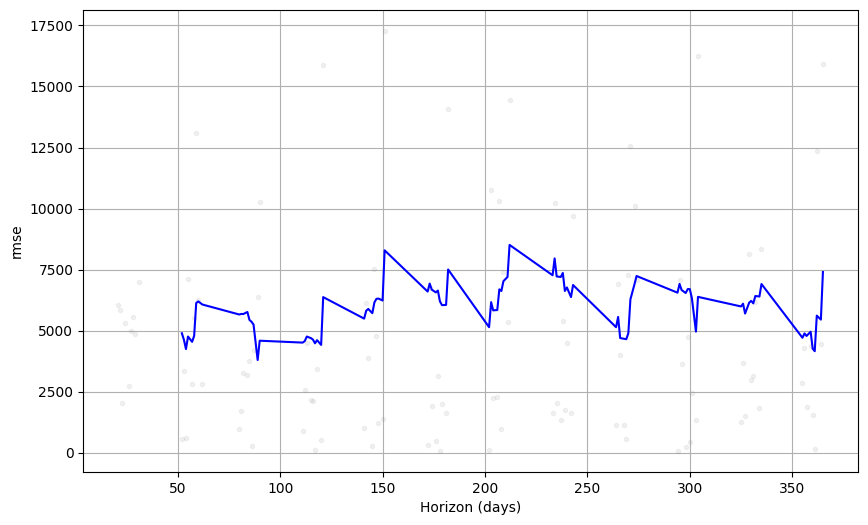

In [45]:
plot_cross_validation_metric(df_cv,metric="rmse");

mape is important

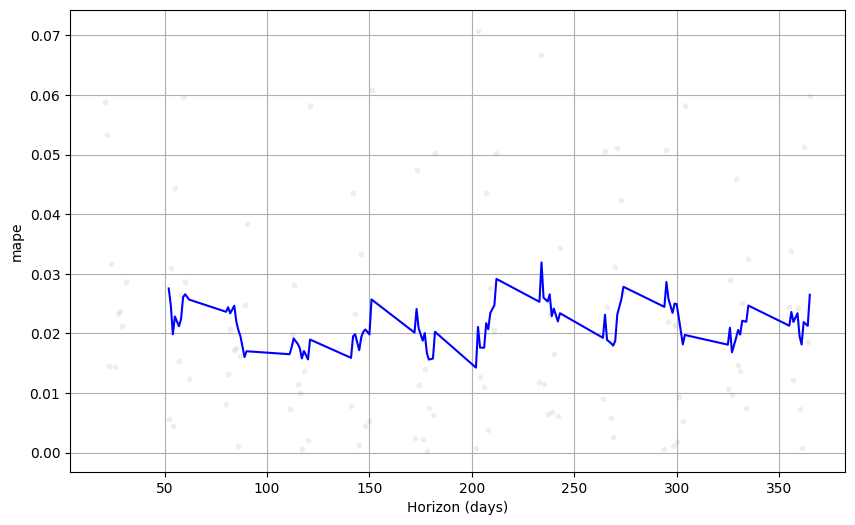

In [46]:
plot_cross_validation_metric(df_cv,metric="mape");

## Trend Changes